In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from melp import Detector
import melp
import math

from melp.clustering.misc import*
import melp.clustering as clump
import melp.clustering.time_cluster as tclump
#from melp import TileAnalyzer
import melp.clustering.spatial_cluster as sclump

plt.rcParams.update({'font.size': 16})

Welcome to JupyROOT 6.24/06


#### Load files

In [2]:
filename_trirec = "./testdata/trirec/trirec1.root"
filename_sorted = "./testdata/sorted/sorted1.root"
#file = ROOT.TFile(filename)
#ttree_mu3e = file.Get("mu3e")

In [3]:
file_rec = ROOT.TFile(filename_trirec)
ttree_trirec = file_rec.Get("frames")
ttree_trirec_mc = file_rec.Get("frames_mc")

frame = 1
ttree_trirec.GetEntry(frame)
ttree_trirec_mc.GetEntry(frame)
   
tid_rec = ttree_trirec.mc_tid
tid_rec_mc = ttree_trirec_mc.mc_tid

tid_counter = 0
for i in tid_rec_mc:
    if i in get_tid_frame(filename_sorted,1).values():
        tid_counter += 1
    else:
        continue

print(tid_counter/(len(get_tid_frame(filename_sorted,1))/100), "%")
print(len(tid_rec_mc)/(len(tid_rec)/100), "%")

10.526315789473685 %
70.0 %


In [4]:
ttree_mu3e_segs = file_rec.Get("segs")
ttree_mu3e_segs.GetEntry(frame)

segs_rec_tid = ttree_mu3e_segs.tl_n

In [5]:
print(segs_rec_tid)

print(tid_rec)

0
{ 28341, 33517, 32299, 34367, 37051, 16492, 16492, 16492, 25876, 25876 }


#### Whole frame as cluster

In [6]:
"""
file = ROOT.TFile(filename_sorted)
ttree_mu3e = file.Get("mu3e")
ttree_mu3e_mc = file.Get("mu3e_mchits")

eff_counter = 0
tot_hit_counter = 0
wrong_counter = 0

eff_counter_arr = []
tot_hit_counter_arr = []
wrong_counter_arr = []

for frame in range(ttree_mu3e.GetEntries()):
    tmp_eff_counter = 0
    tmp_tot_hit_counter = 0
    tmp_wrong_counter = 0
    
    primaries = get_mc_primary_for_hit_frame(filename_sorted,frame)
    cluster = frame_as_cluster(filename_sorted,frame)
    tot_hit_counter += len(cluster)
    tmp_tot_hit_counter += len(cluster)
    for key in cluster.keys():
        if key in primaries.keys():
            if cluster[key] == primaries[key]:
                eff_counter += 1
                tmp_eff_counter += 1
            else:
                wrong_counter += 1
                tmp_wrong_counter += 1
        else:
            continue
        eff_counter_arr.append(tmp_eff_counter)
        tot_hit_counter_arr.append(tmp_tot_hit_counter)
        wrong_counter_arr.append(tmp_wrong_counter)
             
print("Average number of hits per frame: ", tot_hit_counter/ttree_mu3e.GetEntries())
print("Correctly identified: ", eff_counter/(tot_hit_counter/100), "%")
print("Incorrectly identified (not an actual part of cluster): ", wrong_counter/(tot_hit_counter/100), "%")
print("Not identified (actual part of cluster that hasn't been identified): ", 0, "%")
"""

'\nfile = ROOT.TFile(filename_sorted)\nttree_mu3e = file.Get("mu3e")\nttree_mu3e_mc = file.Get("mu3e_mchits")\n\neff_counter = 0\ntot_hit_counter = 0\nwrong_counter = 0\n\neff_counter_arr = []\ntot_hit_counter_arr = []\nwrong_counter_arr = []\n\nfor frame in range(ttree_mu3e.GetEntries()):\n    tmp_eff_counter = 0\n    tmp_tot_hit_counter = 0\n    tmp_wrong_counter = 0\n    \n    primaries = get_mc_primary_for_hit_frame(filename_sorted,frame)\n    cluster = frame_as_cluster(filename_sorted,frame)\n    tot_hit_counter += len(cluster)\n    tmp_tot_hit_counter += len(cluster)\n    for key in cluster.keys():\n        if key in primaries.keys():\n            if cluster[key] == primaries[key]:\n                eff_counter += 1\n                tmp_eff_counter += 1\n            else:\n                wrong_counter += 1\n                tmp_wrong_counter += 1\n        else:\n            continue\n        eff_counter_arr.append(tmp_eff_counter)\n        tot_hit_counter_arr.append(tmp_tot_hit_co

In [7]:
"""
plt.figure(figsize=(18,10))
plt.hist(tot_hit_counter_arr)
plt.hist(wrong_counter_arr)
plt.hist(eff_counter_arr)
plt.show()
"""

'\nplt.figure(figsize=(18,10))\nplt.hist(tot_hit_counter_arr)\nplt.hist(wrong_counter_arr)\nplt.hist(eff_counter_arr)\nplt.show()\n'

In [8]:
"""
plt.figure(figsize=(18,10))
plt.hist(eff_counter_arr + wrong_counter_arr)
plt.show()
"""

'\nplt.figure(figsize=(18,10))\nplt.hist(eff_counter_arr + wrong_counter_arr)\nplt.show()\n'

#### Medium mask

In [9]:
mu3e_detector = Detector.initFromROOT("./testdata/sorted/sorted1.root")
#mu3e_detector = Detector.initFromSave("test_detector_file")

------------------------------
Detector information

Stats:
  - Tiles:  5824
    -> misal:  False
  - Pixel Modules:  2844
  - Loaded Runs (Tiles):  []
  - Loaded Runs (Pixel):  []
------------------------------


In [10]:
#mu3e_detector.save("test_detector_file")

In [11]:
melp.select(mu3e_detector)
print(mu3e_detector)

Detector(TileDetector=<melp.src.tile.TileDetector object at 0x7fd84dfc04c0>, SensorModules=<melp.src.sensor.SensorModule object at 0x7fd84de6f2b0>))


In [12]:
melp.addTileHits("./testdata/sorted/sorted1.root", truth=False, traj=False)
mu3e_detector.info()

------------------------------
Detector information

Stats:
  - Tiles:  5824
    -> misal:  False
  - Pixel Modules:  2844
  - Loaded Runs (Tiles):  [1]
  - Loaded Runs (Pixel):  []
------------------------------


In [13]:
#masks = sclump.build_mask(filename_sorted, 7)
masks = sclump.build_mask_detector_class(filename_sorted, 7, mu3e_detector, mask_type = "big")

keys = []
values = []
for key in masks.keys():
    keys.append(key)
    values.append(masks[key])
    
mu3e_detector.TileDetector.tile[keys[0]].id
mu3e_detector.TileDetector.tile[keys[0]].hits
print(values[0])

[202714, 202715, 202713, 202659, 202658, 202657, 202771, 202770, 202769, 202716, 202712, 202602, 202660, 202656, 202826, 202772, 202768, 202603, 202601, 202827, 202825]


<Figure size 432x288 with 0 Axes>

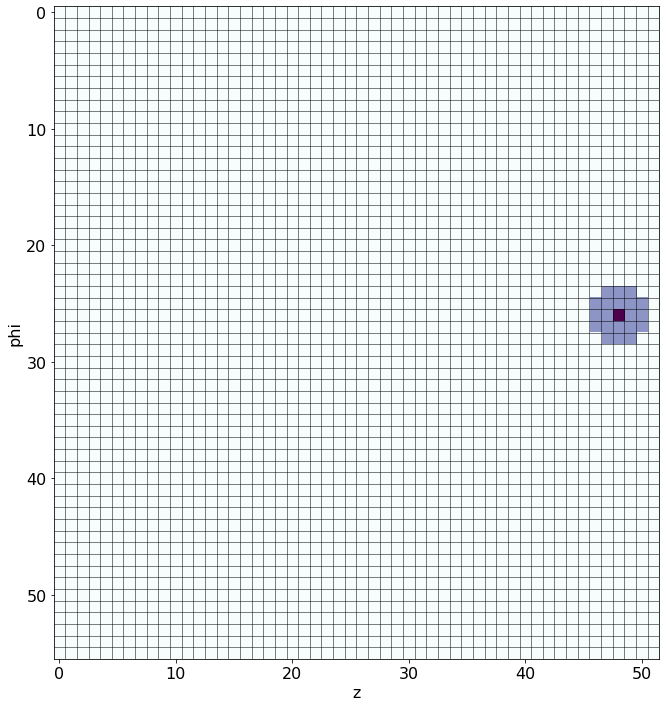

In [14]:
grid = np.zeros((52,56))

all_hits = False
#add hits in frame
if all_hits == True:
    for tile_id in mu3e_detector.TileDetector.tile:
        if tile_id < 300000:
            tile = mu3e_detector.TileDetector.tile[tile_id]
            for hits in tile.hits:
                if hits.frame_id in [7]:
                    id_sel = tile_id - 200000
                    x = math.floor(id_sel/56)
                    y = id_sel % 52
                    grid[x][y] += 1

#add mask
for mask_tile in values[0]:
    if mask_tile < 300000:
        id_sel_mask = mask_tile - 200000
        x = math.floor((id_sel_mask+1)/56)
        y = id_sel_mask % 56
        grid[x][y] += 1
        
#add centre a second time      
if keys[0] < 300000:
    id_sel_mask = keys[0] - 200000
    x = math.floor(id_sel_mask/56)
    y = id_sel_mask % 56
    grid[x][y] += 1
                     
                              
fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(12,12))
#heatplot_mask = ax.imshow(mask_grid.T, cmap='binary')
heatplot = ax.imshow(grid.T, cmap='BuPu')
#ax.grid(which='minor', color='b', linestyle='-', linewidth=1)
plt.hlines(y=np.arange(0, 56)+0.5, xmin=-0.5, xmax=51.5, color="black", linewidth = 0.5)
plt.vlines(x=np.arange(0, 52)+0.5, ymin=-0.5, ymax=55.5, color="black", linewidth = 0.5)
plt.xlabel("z")
plt.ylabel("phi")
#plt.savefig("hitmap.png")
plt.show()